**Using regular expressions for word counts**

In the re package 

- findall returns a list of all matches in a string
- finditer returns an iterator over match objects for matches in a string

In [12]:
import re
with open("PrideAndPredjudice.txt","rb") as fin:
    btext=fin.read()
    text=btext.decode("utf-8")
    #print(text)
#
# findall returns a list of all matches
#
L=re.findall(" the ",text)
print(len(L))

L=re.findall(" a ",text)
print(len(L))


3420
1668


**Determine distribution of gaps between occurences of a word**

In [27]:
it=re.finditer(" [tT]he ",text)
position=[]
for x in it:
    position.append(x.start()+1)

<AxesSubplot:>

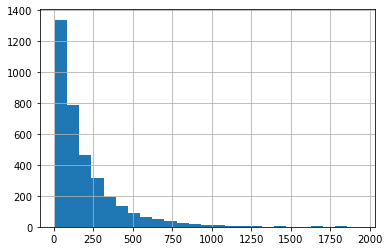

In [28]:
import numpy as np
import pandas as pd
pos=np.array(position)
diffs=np.diff(pos)
pd.Series(diffs).hist(bins=25)

**Using the nltk package**

In [30]:
import nltk #natural language processing toolkit
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The first thing we want to do is tokenize the text.

In [42]:
from nltk.tokenize import word_tokenize
L=word_tokenize(text)

In [43]:
print(L[0:100])

['PRIDE', 'AND', 'PREJUDICE', 'By', 'Jane', 'Austen', 'Chapter', '1', 'It', 'is', 'a', 'truth', 'universally', 'acknowledged', ',', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', ',', 'must', 'be', 'in', 'want', 'of', 'a', 'wife', '.', 'However', 'little', 'known', 'the', 'feelings', 'or', 'views', 'of', 'such', 'a', 'man', 'may', 'be', 'on', 'his', 'first', 'entering', 'a', 'neighbourhood', ',', 'this', 'truth', 'is', 'so', 'well', 'fixed', 'in', 'the', 'minds', 'of', 'the', 'surrounding', 'families', ',', 'that', 'he', 'is', 'considered', 'the', 'rightful', 'property', 'of', 'some', 'one', 'or', 'other', 'of', 'their', 'daughters', '.', '“', 'My', 'dear', 'Mr.', 'Bennet', ',', '”', 'said', 'his', 'lady', 'to', 'him', 'one', 'day', ',', '“']


**Remove any words containing non alphabetic characters**

In [46]:
L2=[x for x in L if not re.search("[^a-zA-Z]",x)]
print(L2[0:100])
print(len(L2))

['PRIDE', 'AND', 'PREJUDICE', 'By', 'Jane', 'Austen', 'Chapter', 'It', 'is', 'a', 'truth', 'universally', 'acknowledged', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', 'must', 'be', 'in', 'want', 'of', 'a', 'wife', 'However', 'little', 'known', 'the', 'feelings', 'or', 'views', 'of', 'such', 'a', 'man', 'may', 'be', 'on', 'his', 'first', 'entering', 'a', 'neighbourhood', 'this', 'truth', 'is', 'so', 'well', 'fixed', 'in', 'the', 'minds', 'of', 'the', 'surrounding', 'families', 'that', 'he', 'is', 'considered', 'the', 'rightful', 'property', 'of', 'some', 'one', 'or', 'other', 'of', 'their', 'daughters', 'My', 'dear', 'Bennet', 'said', 'his', 'lady', 'to', 'him', 'one', 'day', 'have', 'you', 'heard', 'that', 'Netherfield', 'Park', 'is', 'let', 'at', 'last', 'Bennet', 'replied', 'that']
119036


**Convert characters to lower case**

In [47]:
"aBCddeFGH".lower()

'abcddefgh'

In [48]:
L3=[x.lower() for x in L2]

**Lemmatizer**

A lemmatizer can be used to convert pluralized to their singular counterparts. 

There are other applications. For example convert words to one in a smaller set with similar meanings.

In [60]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
from nltk.stem import WordNetLemmatizer 
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("bats"))
print(lemmatizer.lemmatize("oats"))
print(lemmatizer.lemmatize("feet"))
print(lemmatizer.lemmatize("laws"))
print(lemmatizer.lemmatize("geese"))


bat
oat
foot
law
goose


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [66]:
L4=[lemmatizer.lemmatize(x) for x in L3]
len(L4)

119036

**Get word counts**

Many approaches to the analysis of text start with reducing to word frequencies.

For example, one could identify an author of a piece of text from word frequencies.

In [67]:
wcounts={}
L=["a","b","a","c","a","b"]
for x in L:
    if x in wcounts:
        wcounts[x]+=1
    else:
        wcounts[x]=1
print(wcounts)

{'a': 3, 'b': 2, 'c': 1}


In [69]:
wcounts={}
for x in L4:
    if x in wcounts:
        wcounts[x]+=1
    else:
        wcounts[x]=1

**Make a list of pairs from this and sort by value**

In [70]:
wordlist=[(k,wcounts[k]) for k in wcounts]
wordlist=sorted(wordlist,key=lambda x:x[1],reverse=True)

In [72]:
wordlist[0:25]

[('the', 4331),
 ('to', 4135),
 ('of', 3608),
 ('and', 3578),
 ('a', 3126),
 ('her', 2192),
 ('i', 2065),
 ('in', 1864),
 ('wa', 1840),
 ('she', 1695),
 ('it', 1612),
 ('that', 1540),
 ('not', 1525),
 ('he', 1324),
 ('you', 1306),
 ('his', 1256),
 ('be', 1239),
 ('had', 1171),
 ('for', 1057),
 ('with', 1050),
 ('but', 1002),
 ('is', 858),
 ('have', 840),
 ('at', 787),
 ('him', 728)]

**Distribution of word lengths**

We can also look at word length distributions for words in text.

In [83]:
wordlengths={}
for word in L4:
    wordlen=len(word)
    if wordlen not in wordlengths:
        wordlengths[wordlen]=1
    else:
        wordlengths[wordlen]+=1
wordlengths=list(wordlengths.items())
wordlengths=sorted(wordlengths)
wordlengths

[(1, 5308),
 (2, 23399),
 (3, 26023),
 (4, 21939),
 (5, 11288),
 (6, 8829),
 (7, 8078),
 (8, 4748),
 (9, 4748),
 (10, 2218),
 (11, 1218),
 (12, 791),
 (13, 328),
 (14, 107),
 (15, 7),
 (16, 4),
 (17, 3)]

**Function that combines many steps above**

In [104]:
def compute_wordlengths(fileid):
    with open(fileid,"rb") as fin:
        btext=fin.read()
        text=btext.decode("utf-8")
    L=word_tokenize(text)
    L2=[x for x in L if not re.search("[^a-zA-Z]",x)]
    L3=[x.lower() for x in L2]
    wordlengths=np.zeros(20)
    for word in L3:
        wordlen=len(word)
        wordlengths[wordlen]+=1
    wordlengths/=np.sum(wordlengths)
    return(wordlengths)

In [105]:
WL1=compute_wordlengths("PrideAndPredjudice.txt")
WL2=compute_wordlengths("SenseAndSensibility.txt")
WL3=compute_wordlengths("TheAdventuresOfTomSawyer.txt")

In [106]:
WL1

array([0.00000000e+00, 3.37124903e-02, 1.88548002e-01, 2.34786115e-01,
       1.80449612e-01, 9.74159078e-02, 7.32635505e-02, 6.92227561e-02,
       4.12480258e-02, 4.05087537e-02, 1.89102456e-02, 1.11814913e-02,
       6.47703216e-03, 3.16710911e-03, 7.98077892e-04, 2.52024598e-04,
       3.36032797e-05, 2.52024598e-05, 0.00000000e+00, 0.00000000e+00])

In [107]:
WL2

array([0.00000000e+00, 3.41431439e-02, 1.90324356e-01, 2.32179852e-01,
       1.75903146e-01, 9.54697009e-02, 7.86854202e-02, 6.94597307e-02,
       4.74151884e-02, 3.23141914e-02, 2.27486081e-02, 1.10141784e-02,
       6.49035349e-03, 2.78389227e-03, 7.93085589e-04, 2.26595882e-04,
       2.42781303e-05, 2.42781303e-05, 0.00000000e+00, 0.00000000e+00])

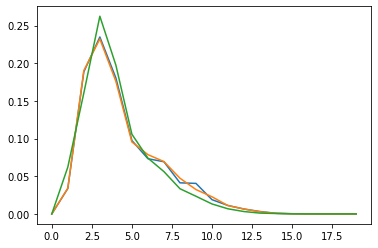

In [111]:
import matplotlib.pyplot as plt
plt.plot(WL1)
plt.plot(WL2)
plt.plot(WL3)